# readme
descrip: plot (1) historic mean (1993-2009) SSH in the North Atlantic between Sunway (transient LR & transient HR) and Altimeter observation; (2) projected SSH (2084-2100 - 1993-2009) between LR and HR. 

update history: <br>
v1.0 DL 2021Apr12 <br>
v1.1 DL 2021Apr23 <br>
v1.2 DL 2021May05 make publication-ready pics <br>
v1.3 DL 2021May19 use 0.25-deg CMEMS AVISO ADT and geostrophic velocity as observation <br>

extra notes: <br>
you should compare observation with transient runs not with transient minus control, see appendix

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# load data

In [2]:
# North Atlantic
lat1, lat2 = 20, 65 
lon1, lon2 = -85, -15 # 85W - 15W 
outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'SSH_HistAndFutureNorthAtlantic_2021May03.png'

In [5]:
infile_obs=('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
              'data_after_manipulation/ADT_Vgeo_CMEMS/'
              'dt_global_allsat_phy_l4_1993-2019_2021May18.nc')
ds_obs = xr.open_dataset(infile_obs)
ds_obs

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 27)
Coordinates:
  * time       (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2019-12-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) float64 ...
    lat_bnds   (time, latitude, nv) float32 ...
    lon_bnds   (time, longitude, nv) float32 ...
    err        (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...

<xarray.DataArray 'adt' (time: 27)>
array([0.41643557, 0.42268535, 0.4208776 , 0.4262029 , 0.42739927,
       0.4306791 , 0.43285581, 0.43550331, 0.44026674, 0.44220708,
       0.44952976, 0.44919307, 0.45127163, 0.4525002 , 0.45331965,
       0.45677367, 0.46073006, 0.46172916, 0.46103048, 0.47121863,
       0.47348148, 0.47674267, 0.48556625, 0.48816706, 0.48905696,
       0.49137853, 0.49766346])
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2019-12-31

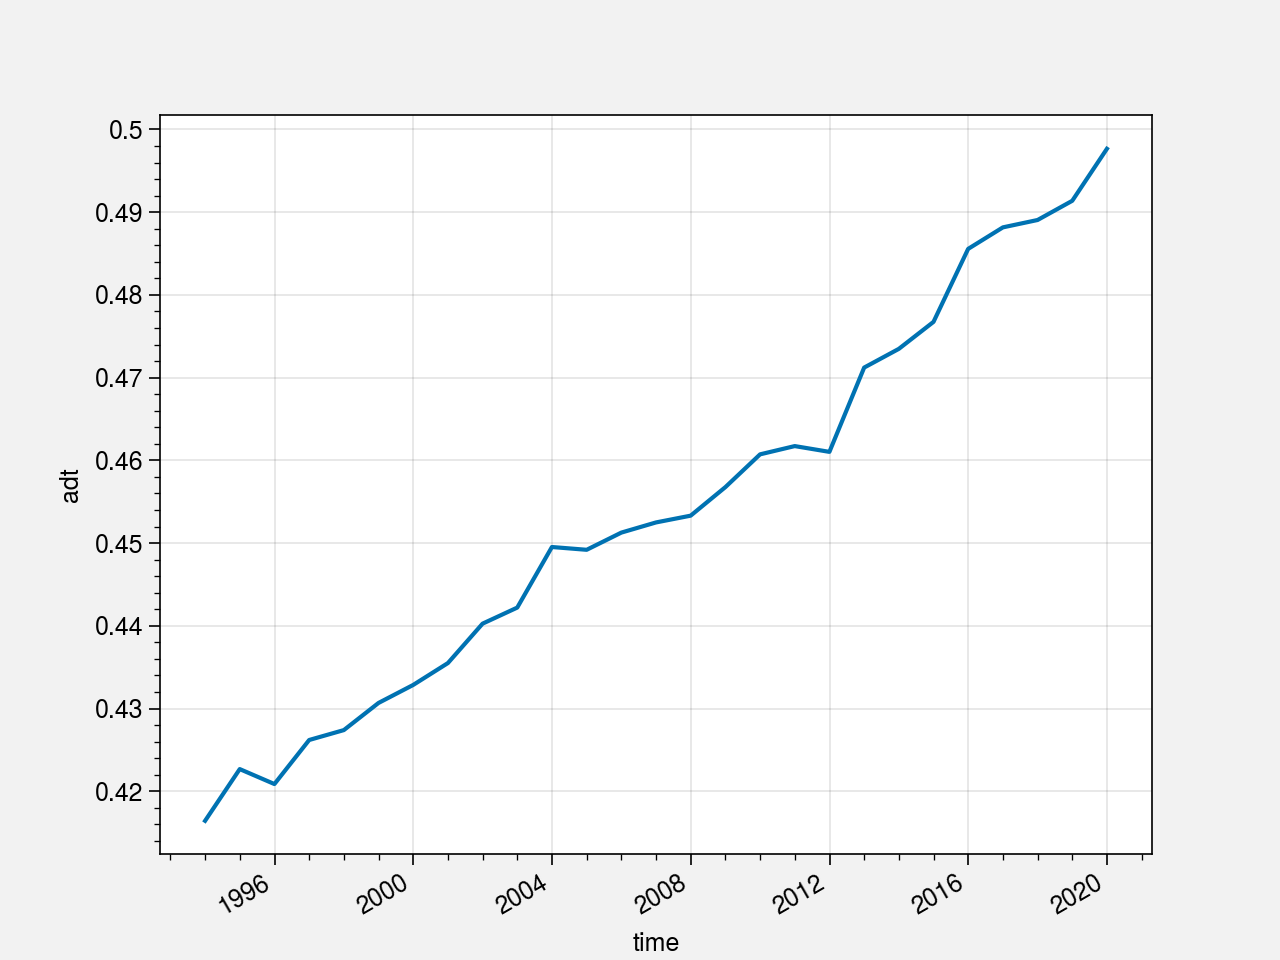

In [8]:
weights_obs = np.cos(np.deg2rad(ds_obs.latitude))
weights_obs.name = "weights_obs"
ssh_gl_av_obs = ds_obs.adt.weighted(weights_obs).mean(("longitude", "latitude")) # unit: m
ssh_gl_av_obs.plot()
ssh_gl_av_obs

In [10]:
ds_obs.adt.sel(time=slice('1993','2019')) 

<xarray.DataArray 'adt' (time: 17, latitude: 720, longitude: 1440)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2009-12-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

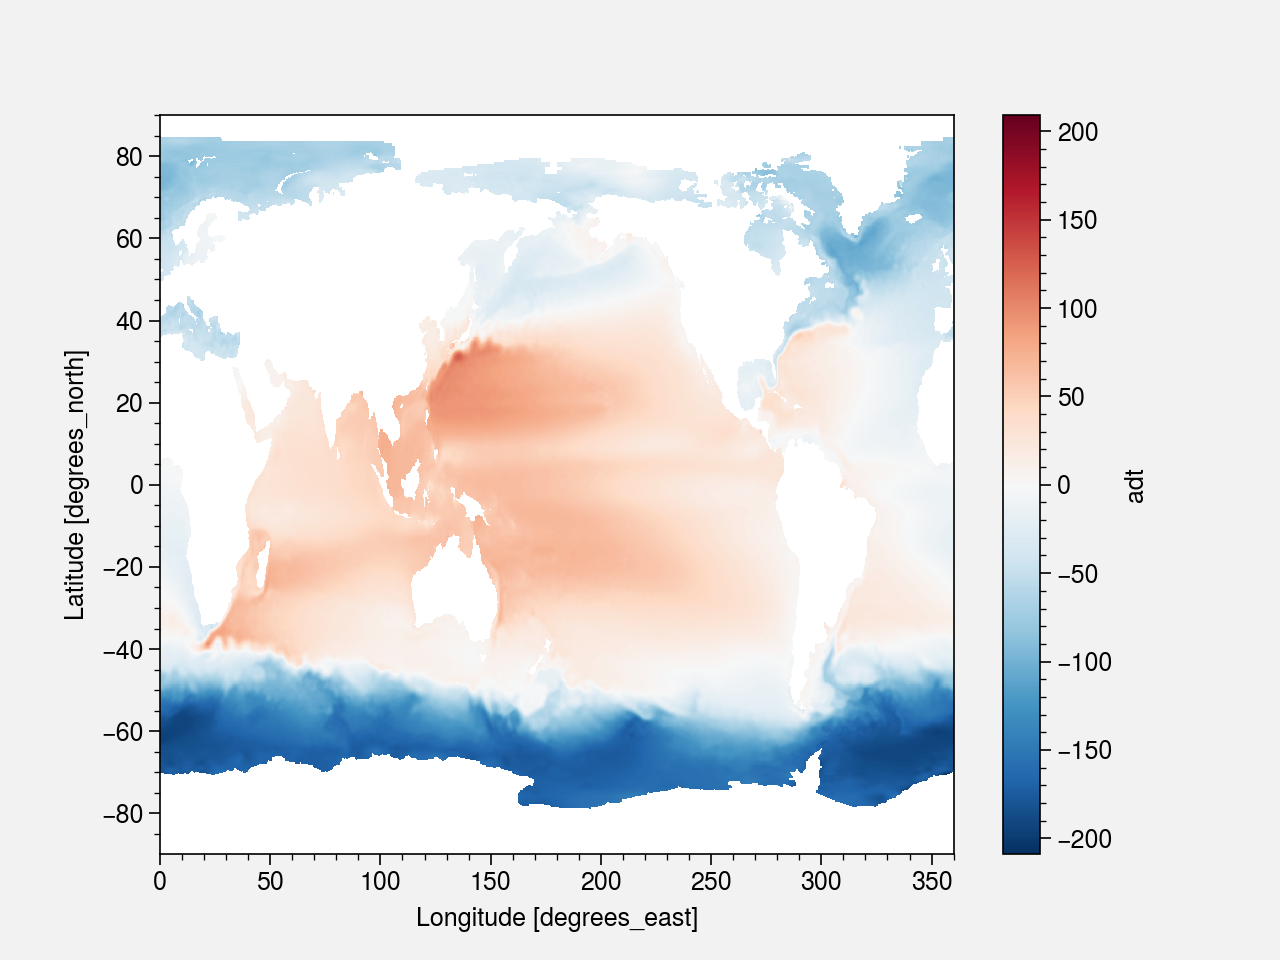

In [11]:
ssh1_obs = (ds_obs.adt-ssh_gl_av_obs).sel(time=slice('1993','2019')).mean('time')*100
# unit: cm
ssh1_obs.plot()

In [12]:
# indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
#          'data_after_manipulation/SSH/')

# infile1_TH = indir + 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc'
infile1_TH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
              'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_TH = xr.open_dataset(infile1_TH)
ds_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 3012)
Coordinates:
  * time        (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 ...
    TLAT        (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object ...
    SSH         (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-29 at 17:54:15.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [13]:
# infile1_TL = indir + 'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc'
infile1_TL = ('/scratch/group/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_TL = xr.open_dataset(infile1_TL)
ds_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 3012)
Coordinates:
  * time        (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 ...
    TLAT        (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object ...
    SSH         (time, nlat, nlon) float32 ...
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Thu May 14 01:43:04 2020: ncra -O -v SSH /home/export/on...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [9]:
infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds0_t12 = xr.open_dataset(infile0_t12)
ds0_t12

<xarray.Dataset>
Dimensions:      (nlat: 2400, nlon: 3600, z_t: 62, z_w: 62, z_w_bot: 62)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:       [2400 3600]
    vertical_dims:      62
    vert_grid_file:     tx0.1v3_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/tx0.1v2/grid/horiz_grid_200709.ieeer8
    topography_fname:   inputdata/ocn/pop/tx0.1v2/grid/topography_km62_201711...
    region_mask_fname:  inputdata/ocn/pop/tx0.1v2/grid/region_mask_20080702.i...
    type:               tripole
    title:              POP_tx0.1v2 grid

In [10]:
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds0_g16 = xr.open_dataset(infile0_g16)
ds0_g16

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

# data analysis 

In [11]:
ssh_gl_av_TH = ds_TH.SSH.sel(time=slice('1993','2009')).weighted(ds0_t12.TAREA).mean(("nlon", "nlat"))
ssh_gl_av_TH # unit: cm, offset is -0.216 cm

<xarray.DataArray 'SSH' (time: 204)>
array([-0.21559982, -0.21559917, -0.21559798, -0.21559687, -0.21559627,
       -0.21559592, -0.21559549, -0.21559535, -0.2155953 , -0.21559502,
       -0.21559463, -0.21559427, -0.21559369, -0.21559325, -0.21559264,
       -0.21559186, -0.21559076, -0.21558981, -0.21558856, -0.21558722,
       -0.21558617, -0.21558525, -0.2155843 , -0.21558278, -0.21558053,
       -0.21557947, -0.21557918, -0.21557828, -0.21557822, -0.21557838,
       -0.21557826, -0.21557766, -0.21557717, -0.21557653, -0.21557593,
       -0.21557546, -0.21557526, -0.21557487, -0.21557529, -0.21557524,
       -0.2155747 , -0.21557465, -0.21557445, -0.21557393, -0.21557303,
       -0.21557196, -0.21557082, -0.21556928, -0.21556785, -0.21556657,
       -0.21556516, -0.21556334, -0.21556176, -0.21556078, -0.21556002,
       -0.21555993, -0.21556042, -0.21556096, -0.21556101, -0.21556081,
       -0.2155606 , -0.21555991, -0.21555802, -0.21555768, -0.21555839,
       -0.21555903, -0.21555897, -0.21555911, -0.21555962, -0.21555925,
       -0.21555807, -0.21555716, -0.21555676, -0.21555618, -0.21555471,
       -0.21555334, -0.21555238, -0.21555175, -0.21555145, -0.21555054,
       -0.21554884, -0.21554701, -0.21554504, -0.21554273, -0.21554075,
       -0.21553928, -0.2155377 , -0.21553589, -0.21553539, -0.2155348 ,
       -0.21553312, -0.21553107, -0.21552943, -0.2155284 , -0.21552674,
       -0.21552443, -0.21552153, -0.215518  , -0.21551402, -0.21551167,
...
       -0.21550034, -0.21549923, -0.2154988 , -0.2154986 , -0.21549849,
       -0.21549773, -0.21549671, -0.21549622, -0.21549527, -0.21549401,
       -0.21549278, -0.21549165, -0.21549034, -0.21548923, -0.21548788,
       -0.21548571, -0.21548332, -0.21548082, -0.21547816, -0.21547597,
       -0.21547409, -0.21547217, -0.21547024, -0.21546889, -0.2154676 ,
       -0.21546587, -0.21546422, -0.21546252, -0.21546062, -0.21545905,
       -0.21545768, -0.2154555 , -0.21545488, -0.21545437, -0.21545443,
       -0.2154553 , -0.21545558, -0.21545548, -0.2154552 , -0.21545481,
       -0.21545442, -0.21545421, -0.21545418, -0.21545349, -0.21545278,
       -0.21545212, -0.21545161, -0.21545152, -0.21545163, -0.21545137,
       -0.21545082, -0.21545004, -0.21544913, -0.21544787, -0.21544577,
       -0.21544407, -0.21544344, -0.21544317, -0.21544271, -0.21544221,
       -0.215442  , -0.21544159, -0.21544146, -0.21544149, -0.21544138,
       -0.21544086, -0.21544048, -0.2154397 , -0.21543957, -0.21543979,
       -0.21543927, -0.2154395 , -0.21543989, -0.21543988, -0.21544045,
       -0.21544119, -0.21544142, -0.21544119, -0.21544077, -0.21544044,
       -0.21543953, -0.21543887, -0.21543853, -0.21543867, -0.21543699,
       -0.2154365 , -0.21543586, -0.21543498, -0.21543419, -0.21543302,
       -0.21543184, -0.21542992, -0.21542845, -0.21542779, -0.21542673,
       -0.21542363, -0.21541875, -0.21541616, -0.2154144 ])
Coordinates:
  * time     (time) object 1993-01-17 00:00:00 ... 2009-12-17 00:00:00

In [12]:
ssh_gl_av_TL = ds_TL.SSH.sel(time=slice('1993','2009')).weighted(ds0_g16.TAREA).mean(("nlon", "nlat")) 
ssh_gl_av_TL # unit: cm, offset is -5e-5 cm

<xarray.DataArray 'SSH' (time: 204)>
array([-5.80926295e-05, -5.79844653e-05, -5.79686641e-05, -5.80212662e-05,
       -5.80668051e-05, -5.81370048e-05, -5.81198157e-05, -5.80966436e-05,
       -5.81331400e-05, -5.81264909e-05, -5.81249695e-05, -5.80828307e-05,
       -5.81195731e-05, -5.81362053e-05, -5.81566630e-05, -5.81795571e-05,
       -5.82367599e-05, -5.82670666e-05, -5.82903312e-05, -5.82687602e-05,
       -5.82411529e-05, -5.81695746e-05, -5.81193566e-05, -5.81516974e-05,
       -5.81839586e-05, -5.83011628e-05, -5.82817801e-05, -5.83188980e-05,
       -5.83980875e-05, -5.84194781e-05, -5.84058828e-05, -5.83924489e-05,
       -5.84048480e-05, -5.83734228e-05, -5.83872307e-05, -5.83611404e-05,
       -5.83365573e-05, -5.83027860e-05, -5.83462119e-05, -5.84196376e-05,
       -5.84166375e-05, -5.84031217e-05, -5.83926219e-05, -5.83810594e-05,
       -5.83757984e-05, -5.83588658e-05, -5.82773883e-05, -5.82458030e-05,
       -5.82912774e-05, -5.83184994e-05, -5.82994953e-05, -5.83364193e-05,
       -5.83730168e-05, -5.83934903e-05, -5.83766654e-05, -5.83731835e-05,
       -5.83442200e-05, -5.83297409e-05, -5.82955857e-05, -5.82824614e-05,
       -5.82688857e-05, -5.83698683e-05, -5.85857644e-05, -5.85864261e-05,
       -5.86024178e-05, -5.86580601e-05, -5.86679056e-05, -5.86556028e-05,
       -5.86601593e-05, -5.86748923e-05, -5.86832813e-05, -5.87266951e-05,
       -5.87639309e-05, -5.87992044e-05, -5.88095211e-05, -5.89020640e-05,
       -5.89730633e-05, -5.89985375e-05, -5.89861335e-05, -5.89589743e-05,
...
       -5.95206264e-05, -5.95238660e-05, -5.95117595e-05, -5.95073887e-05,
       -5.95026435e-05, -5.94943615e-05, -5.95043191e-05, -5.94637474e-05,
       -5.95940403e-05, -5.97757984e-05, -5.98133893e-05, -5.98413048e-05,
       -5.98697796e-05, -5.98757119e-05, -5.98641538e-05, -5.98193099e-05,
       -5.98559178e-05, -5.98762747e-05, -5.98785896e-05, -5.98108008e-05,
       -5.97869562e-05, -5.98804114e-05, -5.99171097e-05, -5.98045624e-05,
       -5.97573885e-05, -5.97451749e-05, -5.97589328e-05, -5.97460270e-05,
       -5.97414142e-05, -5.97335074e-05, -5.97719390e-05, -5.97554594e-05,
       -5.97453257e-05, -5.97341989e-05, -5.96348064e-05, -5.95140597e-05,
       -5.95348684e-05, -5.95436948e-05, -5.95465055e-05, -5.95432057e-05,
       -5.95309712e-05, -5.95170766e-05, -5.94138398e-05, -5.94281578e-05,
       -5.94093563e-05, -5.94488339e-05, -5.92611574e-05, -5.92514281e-05,
       -5.92834416e-05, -5.93181852e-05, -5.93174471e-05, -5.93107136e-05,
       -5.93327858e-05, -5.92947055e-05, -5.93016775e-05, -5.93414494e-05,
       -5.93458058e-05, -5.93766646e-05, -5.93907330e-05, -5.93814442e-05,
       -5.94528787e-05, -5.94389021e-05, -5.94383686e-05, -5.94222853e-05,
       -5.94233804e-05, -5.94509968e-05, -5.94225003e-05, -5.94222376e-05,
       -5.94727792e-05, -5.94901942e-05, -5.95235912e-05, -5.95553204e-05,
       -5.95699646e-05, -5.96025867e-05, -5.95792347e-05, -5.95497450e-05,
       -5.95199106e-05, -5.95621056e-05, -5.95825729e-05, -5.95500369e-05])
Coordinates:
  * time     (time) object 1993-01-17 00:00:00 ... 2009-12-17 00:00:00

In [13]:
ssh1_TH = ds_TH.SSH.sel(time=slice('1993','2009')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.215
# mask land with nan and subtract offset for HR
ssh2_TH = ds_TH.SSH.sel(time=slice('2084','2100')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.215
ssh_df_TH = ssh2_TH - ssh1_TH

ssh1_TL = ds_TL.SSH.sel(time=slice('1993','2009')).mean('time').where(ds0_g16.KMT>0,np.nan)
# mask land with nan, no need to subtract offset for LR cause it's too small
ssh2_TL = ds_TL.SSH.sel(time=slice('2084','2100')).mean('time').where(ds0_g16.KMT>0,np.nan)
ssh_df_TL = ssh2_TL - ssh1_TL

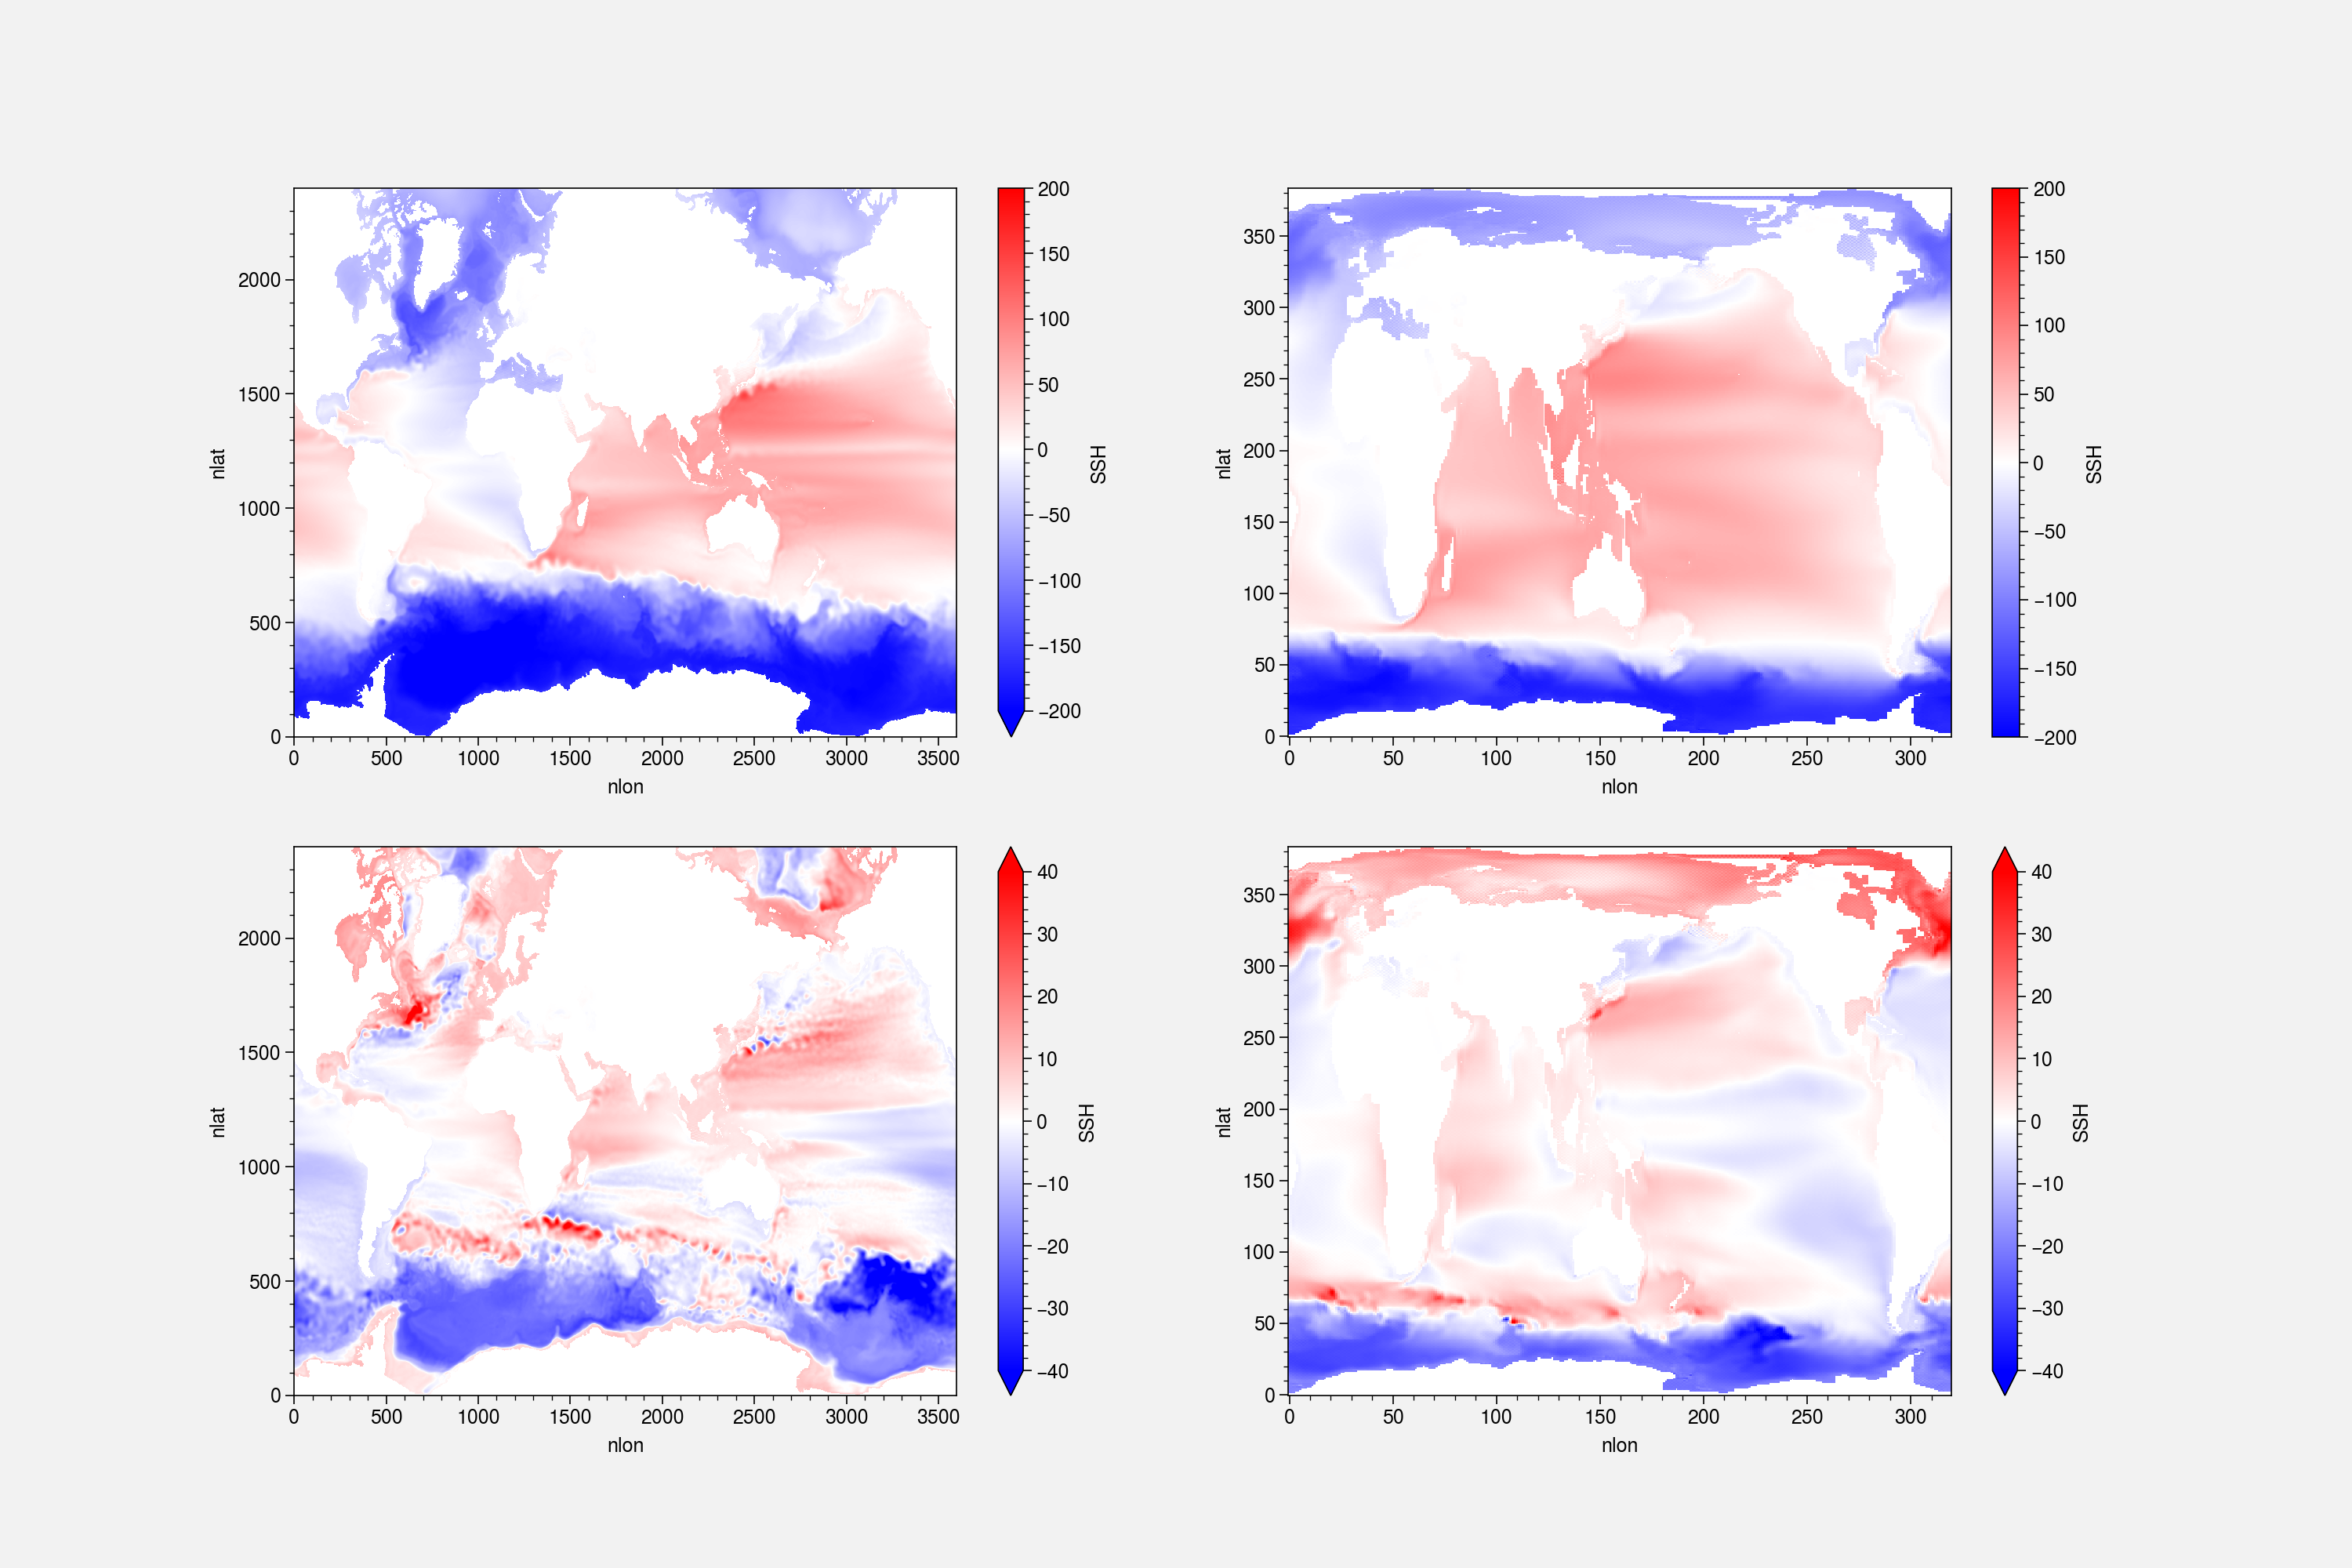

In [14]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
ssh1_TH.plot(ax=axes[0,0],vmin=-200,vmax=200,cmap='bwr')
ssh1_TL.plot(ax=axes[0,1],vmin=-200,vmax=200,cmap='bwr')
ssh_df_TH.plot(ax=axes[1,0],vmin=-40,vmax=40,cmap='bwr')
ssh_df_TL.plot(ax=axes[1,1],vmin=-40,vmax=40,cmap='bwr')

regrid t12 to 1deg grids

In [15]:
ds_1deg = xe.util.grid_global(1, 1)
ds_1deg

<xarray.Dataset>
Dimensions:  (x: 360, x_b: 361, y: 180, y_b: 181)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [16]:
ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
weightfile_t12_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_t12_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_t12_1deg = xe.Regridder(ds0_t12_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_t12_1deg, reuse_weights=True)

ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
weightfile_g16_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_g16_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_g16_1deg = xe.Regridder(ds0_g16_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_g16_1deg, reuse_weights=True)

In [17]:
ssh1_rgd_TH = regridder_t12_1deg(ssh1_TH)
ssh_df_rgd_TH = regridder_t12_1deg(ssh_df_TH)

ssh1_rgd_TL = regridder_g16_1deg(ssh1_TL)
ssh_df_rgd_TL = regridder_g16_1deg(ssh_df_TL)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


# make pics

In [18]:
ssh1_NA_obs = ssh1_obs.sel(lat=slice(lat1, lat2),lon=slice(lon1+360, lon2+360))
ssh1_NA_obs

<xarray.DataArray 'zos' (lat: 45, lon: 70)>
array([[ 14.85617705,  17.59359429,  18.29935144, ..., -21.2234785 ,
        -21.40599865, -21.5915604 ],
       [  8.65883243,  13.02250051,  14.91400139, ..., -21.7378037 ,
                 nan,          nan],
       [  5.35256841,   9.39316549,  11.09364626, ..., -22.46775811,
        -23.18631454, -23.82186792],
       ...,
       [         nan,          nan,          nan, ..., -68.18957856,
        -66.58961468, -65.411894  ],
       [         nan,          nan,          nan, ..., -70.09873779,
        -68.86237382, -68.00855824],
       [         nan,          nan,          nan, ...,          nan,
                 nan, -72.01945926]])
Coordinates:
  * lat      (lat) float64 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float64 275.5 276.5 277.5 278.5 ... 341.5 342.5 343.5 344.5

In [19]:
ssh1_rgd_NA_TL = ssh1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
ssh1_rgd_NA_TH = ssh1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
ssh_df_rgd_NA_TL = ssh_df_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
ssh_df_rgd_NA_TH = ssh_df_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
ssh_df_rgd_NA_TH

<xarray.DataArray 'SSH' (y: 45, x: 70)>
array([[-2.17916436, -2.32301201, -1.45639402, ...,  0.50654619,
         0.75973798,         nan],
       [-2.31154788, -1.79110519, -1.64987765, ...,  0.24844062,
                nan,         nan],
       [-1.71169016,         nan, -2.08087546, ...,  0.92182225,
                nan,         nan],
       ...,
       [12.40554094,         nan,         nan, ..., -3.3100046 ,
        -3.3061254 , -2.70288544],
       [        nan, 13.92357123, 13.92388709, ...,  2.416108  ,
         2.95136908,  3.69862282],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
    lon      (y, x) float64 -84.5 -83.5 -82.5 -81.5 ... -18.5 -17.5 -16.5 -15.5
    lat      (y, x) float64 20.5 20.5 20.5 20.5 20.5 ... 64.5 64.5 64.5 64.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [1]:
pc = cartopy.crs.PlateCarree()

fig1, axs = plot.subplots(nrows=2, ncols=3,proj='cyl', width='15in', height='6in')

# row 1: climatology mean ssh
axs[0,0].contourf(ssh1_rgd_NA_TL.lon, ssh1_rgd_NA_TL.lat, 
        ssh1_rgd_NA_TL, levels=np.arange(-140,40+1,20), transform=pc, 
        vmin=-140, vmax=40, cmap="bwr", extend='both')
axs[0,0].contour(ssh1_rgd_NA_TL.lon, ssh1_rgd_NA_TL.lat, 
        ssh1_rgd_NA_TL, levels=np.arange(-80,-20+1,20), transform=pc, 
        color="k",linestyle='--')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_title('Historic av. SSH LR', fontsize=12)
axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')

axs[0,1].contourf(ssh1_rgd_NA_TH.lon, ssh1_rgd_NA_TH.lat, 
        ssh1_rgd_NA_TH, levels=np.arange(-140,40+1,20), transform=pc, 
        vmin=-140, vmax=40, cmap="bwr", extend='both')
axs[0,1].contour(ssh1_rgd_NA_TH.lon, ssh1_rgd_NA_TH.lat, 
        ssh1_rgd_NA_TH, levels=np.arange(-80,-20+1,20), transform=pc, 
        color="k",linestyle='--')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_title('Historic av. SSH HR', fontsize=12)
axs[0,1].text(-83, 60, 'b', transform=pc, fontsize=12, fontweight='bold')

m1=axs[0,2].contourf(ssh1_NA_obs.lon, ssh1_NA_obs.lat, 
        ssh1_NA_obs, levels=np.arange(-140,40+1,20), transform=pc, 
        vmin=-140, vmax=40, cmap="bwr", extend='both')
axs[0,2].contour(ssh1_NA_obs.lon, ssh1_NA_obs.lat, 
        ssh1_NA_obs, levels=np.arange(-80,-20+1,20), transform=pc, 
        color="k",linestyle='--')
axs[0,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,2].format(land=True, landcolor='grey')
axs[0,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,2].set_title('Historic av. SSH obs.', fontsize=12)
axs[0,2].text(-83, 60, 'c', transform=pc, fontsize=12, fontweight='bold')

# Now adding the colorbar
cb = axs[0,2].colorbar(m1,loc='r',label='[cm]',extend='both',width='2em',shrink=1)


# row 2: projected ssh change
axs[1,0].contourf(ssh_df_rgd_NA_TL.lon, ssh_df_rgd_NA_TL.lat, 
        ssh_df_rgd_NA_TL, levels=np.arange(-20,20+1,5), transform=pc, 
        vmin=-20, vmax=20, cmap="ColdHot", extend='both')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,0].set_title('Projected SSH change LR', fontsize=12)
axs[1,0].text(-83, 60, 'd', transform=pc, fontsize=12, fontweight='bold')

axs[1,1].contourf(ssh_df_rgd_NA_TH.lon, ssh_df_rgd_NA_TH.lat, 
        ssh_df_rgd_NA_TH, levels=np.arange(-20,20+1,5), transform=pc, 
        vmin=-20, vmax=20, cmap="ColdHot", extend='both')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,1].set_title('Projected SSH change HR', fontsize=12)
axs[1,1].text(-83, 60, 'e', transform=pc, fontsize=12, fontweight='bold')

m2=axs[1,2].contourf(ssh_df_rgd_NA_TH.lon, ssh_df_rgd_NA_TH.lat,
        (ssh_df_rgd_NA_TH-ssh_df_rgd_NA_TL), levels=np.arange(-20,20+1,5), transform=pc, 
        vmin=-20, vmax=20, cmap="ColdHot", extend='both')
axs[1,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,2].format(land=True, landcolor='grey')
axs[1,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,2].set_title('Projected SSH change HR-LR', fontsize=12)
axs[1,2].text(-83, 60, 'f', transform=pc, fontsize=12, fontweight='bold')

# Now adding the colorbar
cb = axs[1,2].colorbar(m2,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

fig1.savefig(pic1,bbox_inches='tight')

NameError: name 'cartopy' is not defined

# Appendix 
you should compare observation with transient runs not transient minus control

In [ ]:
infile1_CH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
             'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_CH_raw = xr.open_dataset(infile1_CH)
ds_CH_raw

In [ ]:
ds_CH = ds_CH_raw.assign_coords(time=ds_CH_raw.time.to_pandas().index.shift(1601,'Y')) # s: shift time
ds_CH